# 1 Dependencies import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scripts.utils import fill_infos

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

np.random.seed(294697)

***
# 2 Data import

In [2]:
data = pd.read_csv("datas/sample.csv", index_col=[0], sep=";")

In [3]:
data.shape

(95978, 58)

***
# 3 Overview

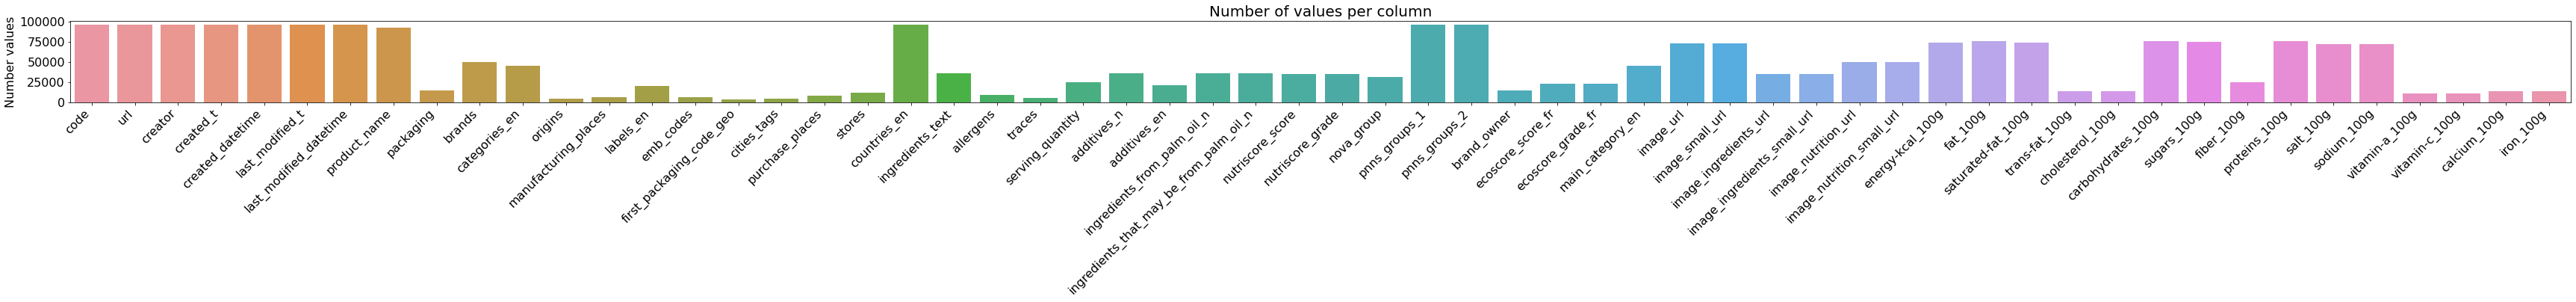

In [4]:
plt.figure(figsize=(60,2))

barplot = sns.barplot(x=data.columns, y=data.count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

***
# 4 Global correlations

In [5]:
corr = data.corr()

In [ ]:
qkml.plot.correlation_heatmap(corr)

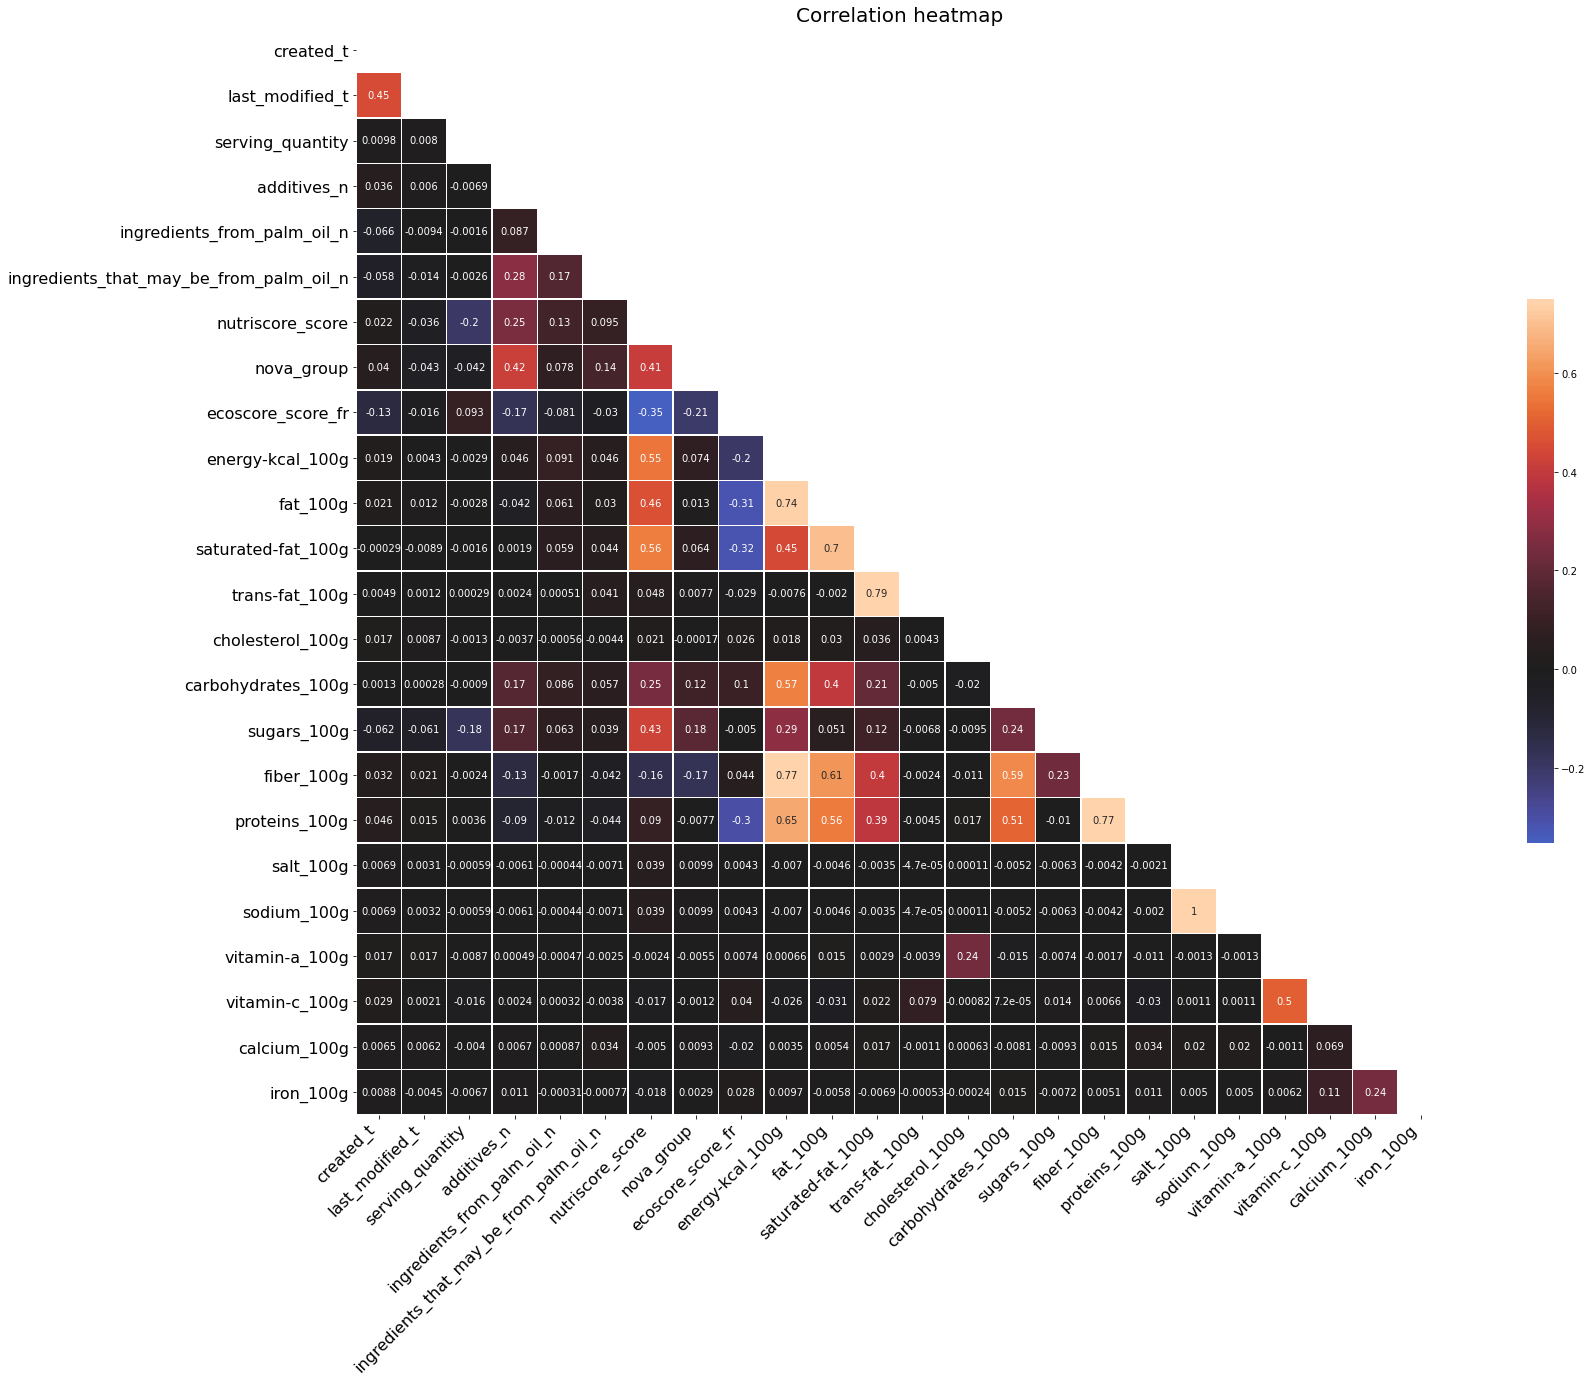

In [6]:
# plt.figure(figsize=(30, 20))

# mask = np.triu(np.ones_like(corr, dtype=bool))

# sns.heatmap(data=corr, mask=mask, annot=True, vmax=.75, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

# plt.title("Correlation heatmap", size=20)
# plt.xticks(rotation=45, size=16, ha="right")
# plt.yticks(size=16)
# plt.show()

***
# 5 Nutriscore / Ecoscore correlations

<AxesSubplot:title={'center':'Nutriscore correlations'}, ylabel='nutriscore_score'>

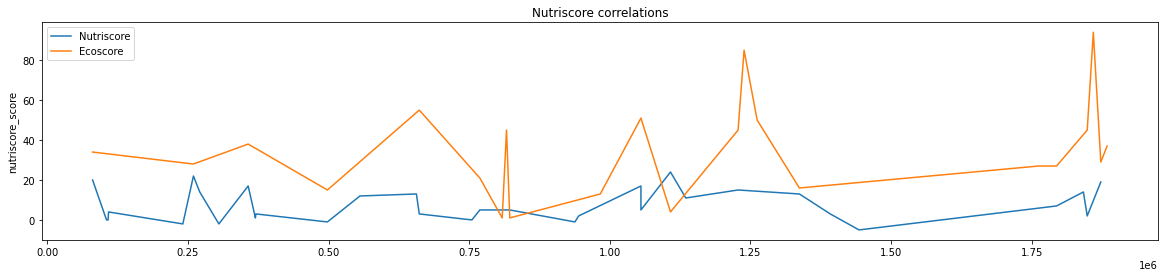

In [7]:
plt.figure(figsize=(20, 4))

plt.title("Nutriscore correlations")

sns.lineplot(y=data.nutriscore_score[::1000], x=data.index[::1000], label="Nutriscore")
sns.lineplot(y=data.ecoscore_score_fr[::1000], x=data.index[::1000], label="Ecoscore")

Nutriscore: the bigger the value, the worst the product is.  
Ecoscore: the bigger the value, the worst the environemental impact is.

## Conclusion:
The worst is a product (high nutriscore), the better it is for the environement (low ecoscore).

***
# 6 Nutriscore / Ecoscore distribution

<Figure size 720x432 with 0 Axes>

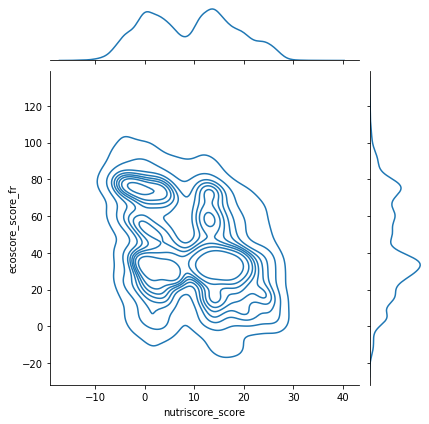

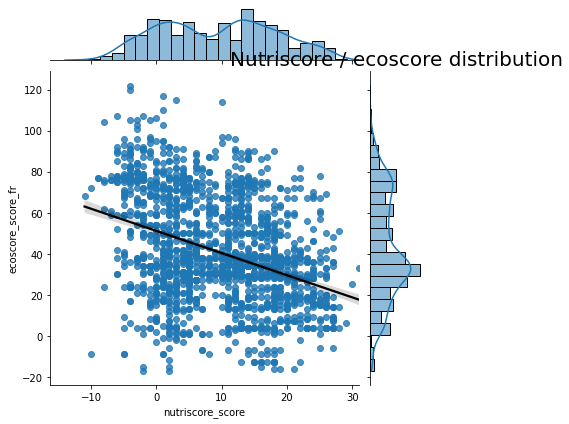

In [8]:
fig = plt.figure(figsize=(10, 6))

sns.jointplot(x="nutriscore_score", y="ecoscore_score_fr", data=data.iloc[::1], kind="kde")
sns.jointplot(x="nutriscore_score", y="ecoscore_score_fr", data=data.iloc[::10], kind="reg", color=None, joint_kws={"line_kws": {'color':'black'}})

plt.title("Nutriscore / ecoscore distribution", size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("Nutriscore", size=16)
plt.ylabel("Ecoscore", size=16)
plt.show()

***
# 7 Nutriscore / countries disribution

In [9]:
data.iloc[10:].countries_en.head(20)

85553     United States
65148            France
94382     United States
82400     United States
19422     United States
67511     United States
24882     United States
92785     United States
99483     United States
2867     United Kingdom
84562     United States
43624     United States
89620     United States
91407     United States
9657      United States
55132     United States
86059     United States
9065      United States
17348     United States
49748      France,Spain
Name: countries_en, dtype: object

The feature "countries_en" is in reality a list, as we can see at index 47266: France,United Kingdom.  
We will choose to keep only the last country in this list for each row.

In [10]:
def keep_last_country(row):
    cotr = row["countries_en"]
    splt = cotr.split(",")
    row["countries_en"] = splt[-1]
    return row

data = data[data.countries_en.notna()].apply(lambda row: keep_last_country(row), axis=1)

In [11]:
data.iloc[10:].countries_en.head(20)

85553     United States
65148            France
94382     United States
82400     United States
19422     United States
67511     United States
24882     United States
92785     United States
99483     United States
2867     United Kingdom
84562     United States
43624     United States
89620     United States
91407     United States
9657      United States
55132     United States
86059     United States
9065      United States
17348     United States
49748             Spain
Name: countries_en, dtype: object

Let's see now how the nutriscore is distributed by country.

In [12]:
data_by_countries_nutriscore = data.groupby(["countries_en", "nutriscore_grade"]).nutriscore_grade.agg([len])
data_by_countries_nutriscore

len
countries_en              nutriscore_grade      
Algeria                   d                    2
                          e                    3
Allemagne                 b                    1
                          e                    1
Andorra                   d                    1
Angola                    b                    1
Argentina                 a                    6
                          b                    5
                          c                    3
                          d                    7
                          e                    1
Australia                 a                   22
                          b                   20
                          c                   14
                          d                   27
                          e                   11
Austria                   a                   10
                          b                    9
                          c                   11
                          d                   20
                          e                    8
Autriche                  d                    1
Bangladesh                c                    1
Barbados                  d                    1
Belgique                  c                    1
                          d                    1
                          e                    1
Belgium                   a                   74
                          b                   71
                          c                  108
                          d                  142
                          e                   69
Benin                     e                    1
Bolivia                   d                    1
Bosnia and Herzegovina    d                    1
                          e                    1
Brazil                    a                    2
                          b                    1
                          c                    3
                          d                    3
Bulgaria                  a                    1
                          d                    2
                          e                    1
Burkina Faso              c                    1
                          e                    1
Cameroon                  b                    1
Canada                    a                   21
                          b                   17
                          c                   44
                          d                   39
                          e                   25
Cape Verde                a                    1
Chile                     a                    1
                          b                    1
                          c                    4
                          d                    1
China                     a                    1
                          c                    1
Colombia                  a                    6
                          b                    6
                          c                    5
                          d                    5
                          e                    5
Corn                      a                    1
Costa Rica                b                    1
                          c                    1
                          d                    1
Croatia                   a                    1
                          c                    1
                          d                    2
                          e                    2
Cuba                      b                    1
                          e                    1
Cyprus                    a                    1
                          d                    1
Czech Republic            a                    2
                          b                    8
                          c                    7
                          d                    8
                          e                    5
Côte d'Ivoire             b

In [13]:
data_by_countries_nutriscore = data_by_countries_nutriscore.reset_index()
data_by_countries_nutriscore.head()

,countries_en,nutriscore_grade,len
0,Algeria,d,2
1,Algeria,e,3
2,Allemagne,b,1
3,Allemagne,e,1
4,Andorra,d,1


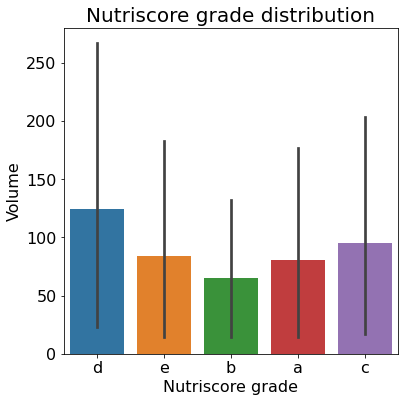

In [14]:
plt.figure(figsize=(6,6))

sns.barplot(x=data_by_countries_nutriscore["nutriscore_grade"], y=data_by_countries_nutriscore["len"])

plt.title("Nutriscore grade distribution", size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("Nutriscore grade", size=16)
plt.ylabel("Volume", size=16)
plt.show()

In [15]:
nutriscore_distrib_per_country = data_by_countries_nutriscore.loc[data_by_countries_nutriscore.countries_en.isin(["France", "Germany", "Belgium", "Canad", "Italy", "Mexico", "Netherlands", "Poland", "Portugal", "Spain", "Sweden", "Switzerland", "United Kingdom", "United States"])]

<Figure size 2160x432 with 0 Axes>

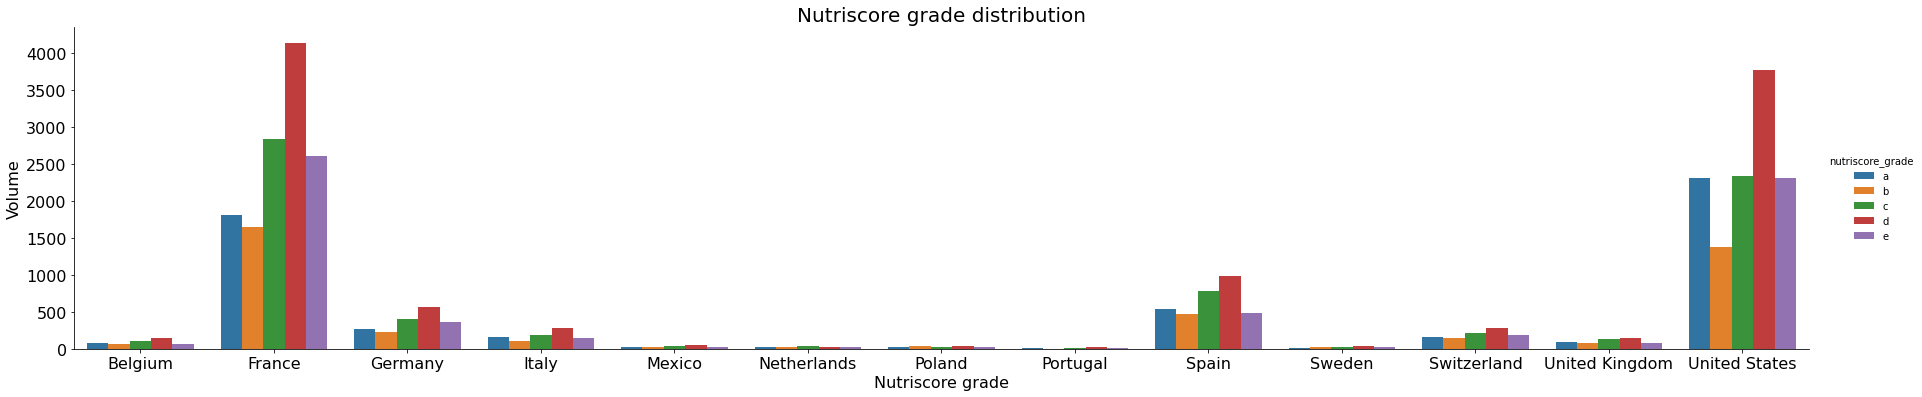

In [16]:
plt.figure(figsize=(30,6))

sns.catplot(x="countries_en", y="len", hue="nutriscore_grade", data=nutriscore_distrib_per_country, kind="bar", height=5, aspect=5)

plt.title("Nutriscore grade distribution", size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("Nutriscore grade", size=16)
plt.ylabel("Volume", size=16)
plt.show()

***
# 8 Ecoscore / countries distribution

Let's see now how the ecoscore is distributed by country.

In [17]:
data_by_countries_ecoscore = data.groupby(["countries_en", "ecoscore_grade_fr"]).ecoscore_grade_fr.agg([len])
data_by_countries_ecoscore

len
countries_en              ecoscore_grade_fr      
Algeria                   b                     2
                          c                     4
                          d                    10
                          e                     2
Allemagne                 b                     1
Andorra                   e                     1
Angola                    b                     1
                          d                     1
Argentina                 a                     1
                          b                    10
                          c                     8
                          d                    19
                          e                     7
Australia                 a                     7
                          b                    35
                          c                    23
                          d                    24
                          e                    10
Austria                   a                     3
                          b                    12
                          c                    15
                          d                     8
                          e                     6
Autriche                  b                     1
Azerbaijan                d                     1
Bahrain                   b                     1
                          e                     1
Bangladesh                d                     1
Belarus                   d                     1
Belgium                   a                    12
                          b                   114
                          c                    70
                          d                   139
                          e                    96
Benin                     c                     1
Bolivia                   b                     7
                          c                     3
                          d                     2
                          e                     1
Bosnia and Herzegovina    b                     1
Brazil                    b                     2
                          c                     4
                          d                     7
Bulgaria                  b                     1
                          d                     3
Burkina Faso              b                     1
                          c                     1
Cambodia                  b                     1
                          d                     1
Cameroon                  b                     2
                          c                     1
                          d                     1
Canada                    b                    22
                          c                    20
                          d                    41
                          e                    19
Chile                     b                     2
                          c                     3
                          d                     6
China                     c                     1
Colombia                  b                    12
                          c                     4
                          d                     6
                          e                     2
Comoros                   d                     1
Corn                      b                     1
Costa Rica                d                     2
Croatia                   a                     1
                          b                     1
                          d                     3
Cuba                      e                     1
Cyprus                    d                     1
Czech Republic            a                     3
                          b                     2
                          c                     6
                          d                     1
                          e                     4
Côte d'Ivoire             c                     2
                          d                   

In [18]:
data_by_countries_ecoscore = data_by_countries_ecoscore.reset_index()
data_by_countries_ecoscore.head()

,countries_en,ecoscore_grade_fr,len
0,Algeria,b,2
1,Algeria,c,4
2,Algeria,d,10
3,Algeria,e,2
4,Allemagne,b,1


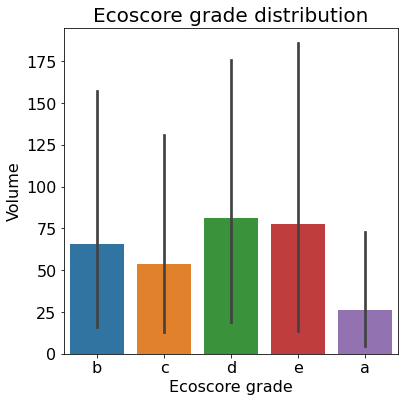

In [19]:
plt.figure(figsize=(6,6))

sns.barplot(x=data_by_countries_ecoscore["ecoscore_grade_fr"], y=data_by_countries_ecoscore["len"])

plt.title("Ecoscore grade distribution", size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("Ecoscore grade", size=16)
plt.ylabel("Volume", size=16)
plt.show()

In [20]:
ecoscore_distrib_per_country = data_by_countries_ecoscore.loc[data_by_countries_ecoscore.countries_en.isin(["France", "Germany", "Belgium", "Canad", "Italy", "Mexico", "Netherlands", "Poland", "Portugal", "Spain", "Sweden", "Switzerland", "United Kingdom", "United States"])]

<Figure size 2160x432 with 0 Axes>

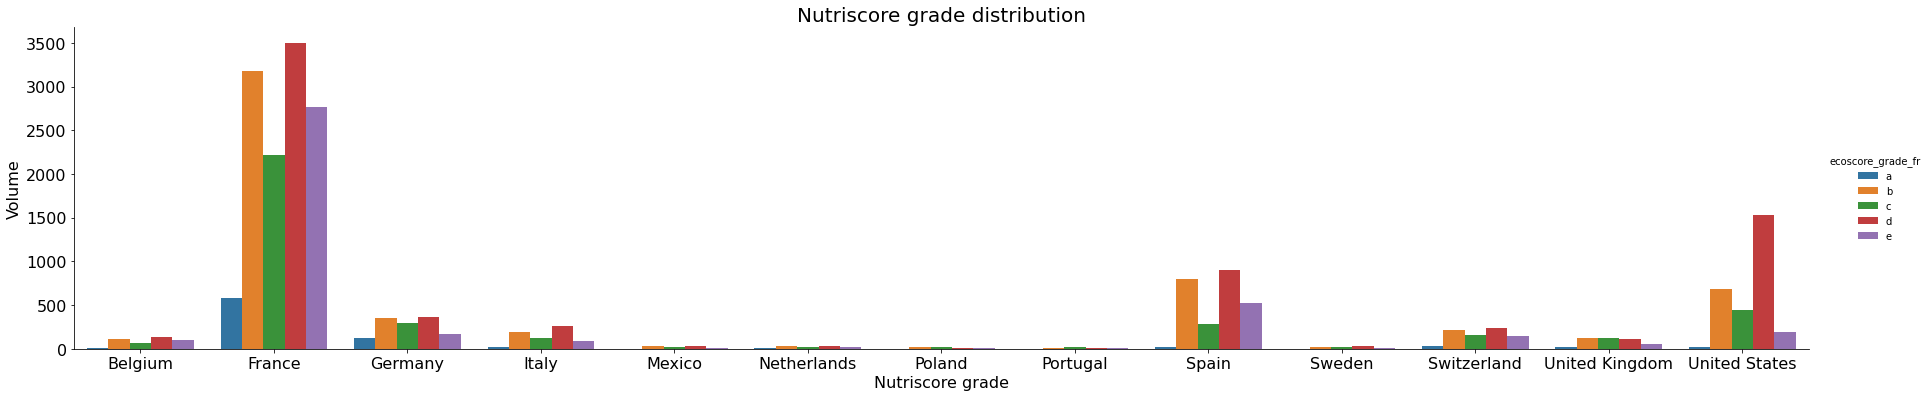

In [21]:
plt.figure(figsize=(30,6))

sns.catplot(x="countries_en", y="len", hue="ecoscore_grade_fr", data=ecoscore_distrib_per_country, kind="bar", height=5, aspect=5)

plt.title("Nutriscore grade distribution", size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("Nutriscore grade", size=16)
plt.ylabel("Volume", size=16)
plt.show()

***
# ---

## categorical to numerical transformation test

In [22]:
data["ecoscore_CAT"] = data["ecoscore_grade_fr"].astype("category").cat.codes

In [23]:
data["nutriscore_CAT"] = data["nutriscore_grade"].astype("category").cat.codes

In [24]:
data.loc[:, ["ecoscore_CAT", "nutriscore_CAT"]].head()

,ecoscore_CAT,nutriscore_CAT
58220,-1,-1
63345,-1,4
35018,-1,2
41735,-1,-1
99865,1,0


## correlation: nutriscore/ecoscore/countries

In [25]:
data["countries_NUM"] = data["countries_en"].astype("category").cat.codes

In [26]:
data.loc[:, ["countries_NUM", "nutriscore_CAT", "ecoscore_CAT"]].head()

,countries_NUM,nutriscore_CAT,ecoscore_CAT
58220,193,-1,-1
63345,193,4,-1
35018,193,2,-1
41735,193,-1,-1
99865,193,0,1


In [27]:
data.loc[:, ["countries_NUM", "nutriscore_CAT", "ecoscore_CAT"]].corr()

,countries_NUM,nutriscore_CAT,ecoscore_CAT
countries_NUM,1.000000,0.143103,-0.093672
nutriscore_CAT,0.143103,1.000000,0.452891
ecoscore_CAT,-0.093672,0.452891,1.000000


## correlation: nutriscore/ecoscore/brands

In [28]:
data["brands_NUM"] = data["brands"].astype('category').cat.codes

In [29]:
data.loc[:, ["brands_NUM", "nutriscore_CAT", "ecoscore_CAT"]].head()

,brands_NUM,nutriscore_CAT,ecoscore_CAT
58220,3106,-1,-1
63345,-1,4,-1
35018,17415,2,-1
41735,-1,-1,-1
99865,11267,0,1


In [30]:
data.loc[:, ["brands_NUM", "nutriscore_CAT", "ecoscore_CAT"]].corr()

,brands_NUM,nutriscore_CAT,ecoscore_CAT
brands_NUM,1.000000,0.176547,0.141365
nutriscore_CAT,0.176547,1.000000,0.452891
ecoscore_CAT,0.141365,0.452891,1.000000


## correlation: nutriscore/ecoscore/packaging

In [31]:
data["packaging_NUM"] = data["packaging"].astype("category").cat.codes

In [32]:
data.loc[:, ["packaging_NUM", "nutriscore_CAT", "ecoscore_CAT"]].head()

,packaging_NUM,nutriscore_CAT,ecoscore_CAT
58220,-1,-1,-1
63345,-1,4,-1
35018,-1,2,-1
41735,-1,-1,-1
99865,-1,0,1


In [33]:
data.loc[:, ["packaging_NUM", "nutriscore_CAT", "ecoscore_CAT"]].corr()

,packaging_NUM,nutriscore_CAT,ecoscore_CAT
packaging_NUM,1.000000,0.161208,0.178583
nutriscore_CAT,0.161208,1.000000,0.452891
ecoscore_CAT,0.178583,0.452891,1.000000


## correlation: nutriscore/ecoscore/categories_en

In [34]:
data["categories_en_NUM"] = data["categories_en"].astype("category").cat.codes

In [35]:
data.loc[:, ["categories_en_NUM", "nutriscore_CAT", "ecoscore_CAT"]].head()

,categories_en_NUM,nutriscore_CAT,ecoscore_CAT
58220,-1,-1,-1
63345,7284,4,-1
35018,3718,2,-1
41735,693,-1,-1
99865,6342,0,1


In [36]:
data.loc[:, ["categories_en_NUM", "nutriscore_CAT", "ecoscore_CAT"]].corr()

,categories_en_NUM,nutriscore_CAT,ecoscore_CAT
categories_en_NUM,1.000000,0.593961,0.428248
nutriscore_CAT,0.593961,1.000000,0.452891
ecoscore_CAT,0.428248,0.452891,1.000000


## correlation: nutriscore/ecoscore/labels_en

In [37]:
data["labels_en_NUM"] = data["labels_en"].astype("category").cat.codes

In [38]:
data.loc[:, ["labels_en_NUM", "nutriscore_CAT", "ecoscore_CAT"]].head()

,labels_en_NUM,nutriscore_CAT,ecoscore_CAT
58220,-1,-1,-1
63345,-1,4,-1
35018,-1,2,-1
41735,-1,-1,-1
99865,-1,0,1


In [39]:
data.loc[:, ["labels_en_NUM", "nutriscore_CAT", "ecoscore_CAT"]].corr()

,labels_en_NUM,nutriscore_CAT,ecoscore_CAT
labels_en_NUM,1.000000,0.109565,0.139304
nutriscore_CAT,0.109565,1.000000,0.452891
ecoscore_CAT,0.139304,0.452891,1.000000


## correlation: nutriscore/ecoscore/serving_quantity

In [40]:
data["serving_quantity_NUM"] = data["serving_quantity"].astype("category").cat.codes

In [41]:
data.loc[:, ["serving_quantity_NUM", "nutriscore_CAT", "ecoscore_CAT"]].head()

,serving_quantity_NUM,nutriscore_CAT,ecoscore_CAT
58220,206,-1,-1
63345,219,4,-1
35018,318,2,-1
41735,637,-1,-1
99865,426,0,1


In [42]:
data.loc[:, ["serving_quantity_NUM", "nutriscore_CAT", "ecoscore_CAT"]].corr()

,serving_quantity_NUM,nutriscore_CAT,ecoscore_CAT
serving_quantity_NUM,1.000000,0.274112,0.002748
nutriscore_CAT,0.274112,1.000000,0.452891
ecoscore_CAT,0.002748,0.452891,1.000000


## correlation: nutriscore/ecoscore/pnns_groups_1/pnns_groups_2

In [43]:
data["pnns_groups_1_NUM"] = data["pnns_groups_1"].astype("category").cat.codes

In [44]:
data["pnns_groups_2_NUM"] = data["pnns_groups_2"].astype("category").cat.codes

In [45]:
data.loc[:, ["pnns_groups_1_NUM", "pnns_groups_2_NUM", "nutriscore_CAT", "ecoscore_CAT"]].head()

,pnns_groups_1_NUM,pnns_groups_2_NUM,nutriscore_CAT,ecoscore_CAT
58220,10,39,-1,-1
63345,10,39,4,-1
35018,5,29,2,-1
41735,1,2,-1,-1
99865,6,37,0,1


In [46]:
data.loc[:, ["pnns_groups_1_NUM", "pnns_groups_1_NUM", "nutriscore_CAT", "ecoscore_CAT"]].corr()

,pnns_groups_1_NUM,pnns_groups_1_NUM,nutriscore_CAT,ecoscore_CAT
pnns_groups_1_NUM,1.000000,1.000000,-0.390994,-0.394311
pnns_groups_1_NUM,1.000000,1.000000,-0.390994,-0.394311
nutriscore_CAT,-0.390994,-0.390994,1.000000,0.452891
ecoscore_CAT,-0.394311,-0.394311,0.452891,1.000000


## correlation: nutriscore/ecoscore/brand_owner

In [47]:
data["brand_owner_NUM"] = data["brand_owner"].astype("category").cat.codes

In [48]:
data.loc[:, ["brand_owner_NUM", "nutriscore_CAT", "ecoscore_CAT"]].head()

,brand_owner_NUM,nutriscore_CAT,ecoscore_CAT
58220,-1,-1,-1
63345,1591,4,-1
35018,4028,2,-1
41735,3691,-1,-1
99865,2643,0,1


In [49]:
data.loc[:, ["brand_owner_NUM", "nutriscore_CAT", "ecoscore_CAT"]].corr()

,brand_owner_NUM,nutriscore_CAT,ecoscore_CAT
brand_owner_NUM,1.000000,0.294350,-0.046799
nutriscore_CAT,0.294350,1.000000,0.452891
ecoscore_CAT,-0.046799,0.452891,1.000000


## correlation: nutriscore/ecoscore/nova_group

In [50]:
data["nova_group_NUM"] = data["nova_group"].astype("category").cat.codes

In [51]:
data.loc[:, ["nova_group_NUM", "nutriscore_CAT", "ecoscore_CAT"]].head()

,nova_group_NUM,nutriscore_CAT,ecoscore_CAT
58220,3,-1,-1
63345,3,4,-1
35018,3,2,-1
41735,3,-1,-1
99865,2,0,1


In [52]:
data.loc[:, ["nova_group_NUM", "nutriscore_CAT", "ecoscore_CAT"]].corr()

,nova_group_NUM,nutriscore_CAT,ecoscore_CAT
nova_group_NUM,1.000000,0.485882,0.144806
nutriscore_CAT,0.485882,1.000000,0.452891
ecoscore_CAT,0.144806,0.452891,1.000000


## correlation: nutriscore/ecoscore/additives_en

In [53]:
data["additives_en_NUM"] = data["additives_en"].astype("category").cat.codes

In [54]:
data.loc[:, ["additives_en_NUM", "nutriscore_CAT", "ecoscore_CAT"]].head()

,additives_en_NUM,nutriscore_CAT,ecoscore_CAT
58220,1399,-1,-1
63345,7730,4,-1
35018,6596,2,-1
41735,2148,-1,-1
99865,-1,0,1


In [55]:
data.loc[:, ["additives_en_NUM", "nutriscore_CAT", "ecoscore_CAT"]].corr()

,additives_en_NUM,nutriscore_CAT,ecoscore_CAT
additives_en_NUM,1.000000,0.351996,0.081593
nutriscore_CAT,0.351996,1.000000,0.452891
ecoscore_CAT,0.081593,0.452891,1.000000


## corr recap

In [56]:
corr = data.corr()

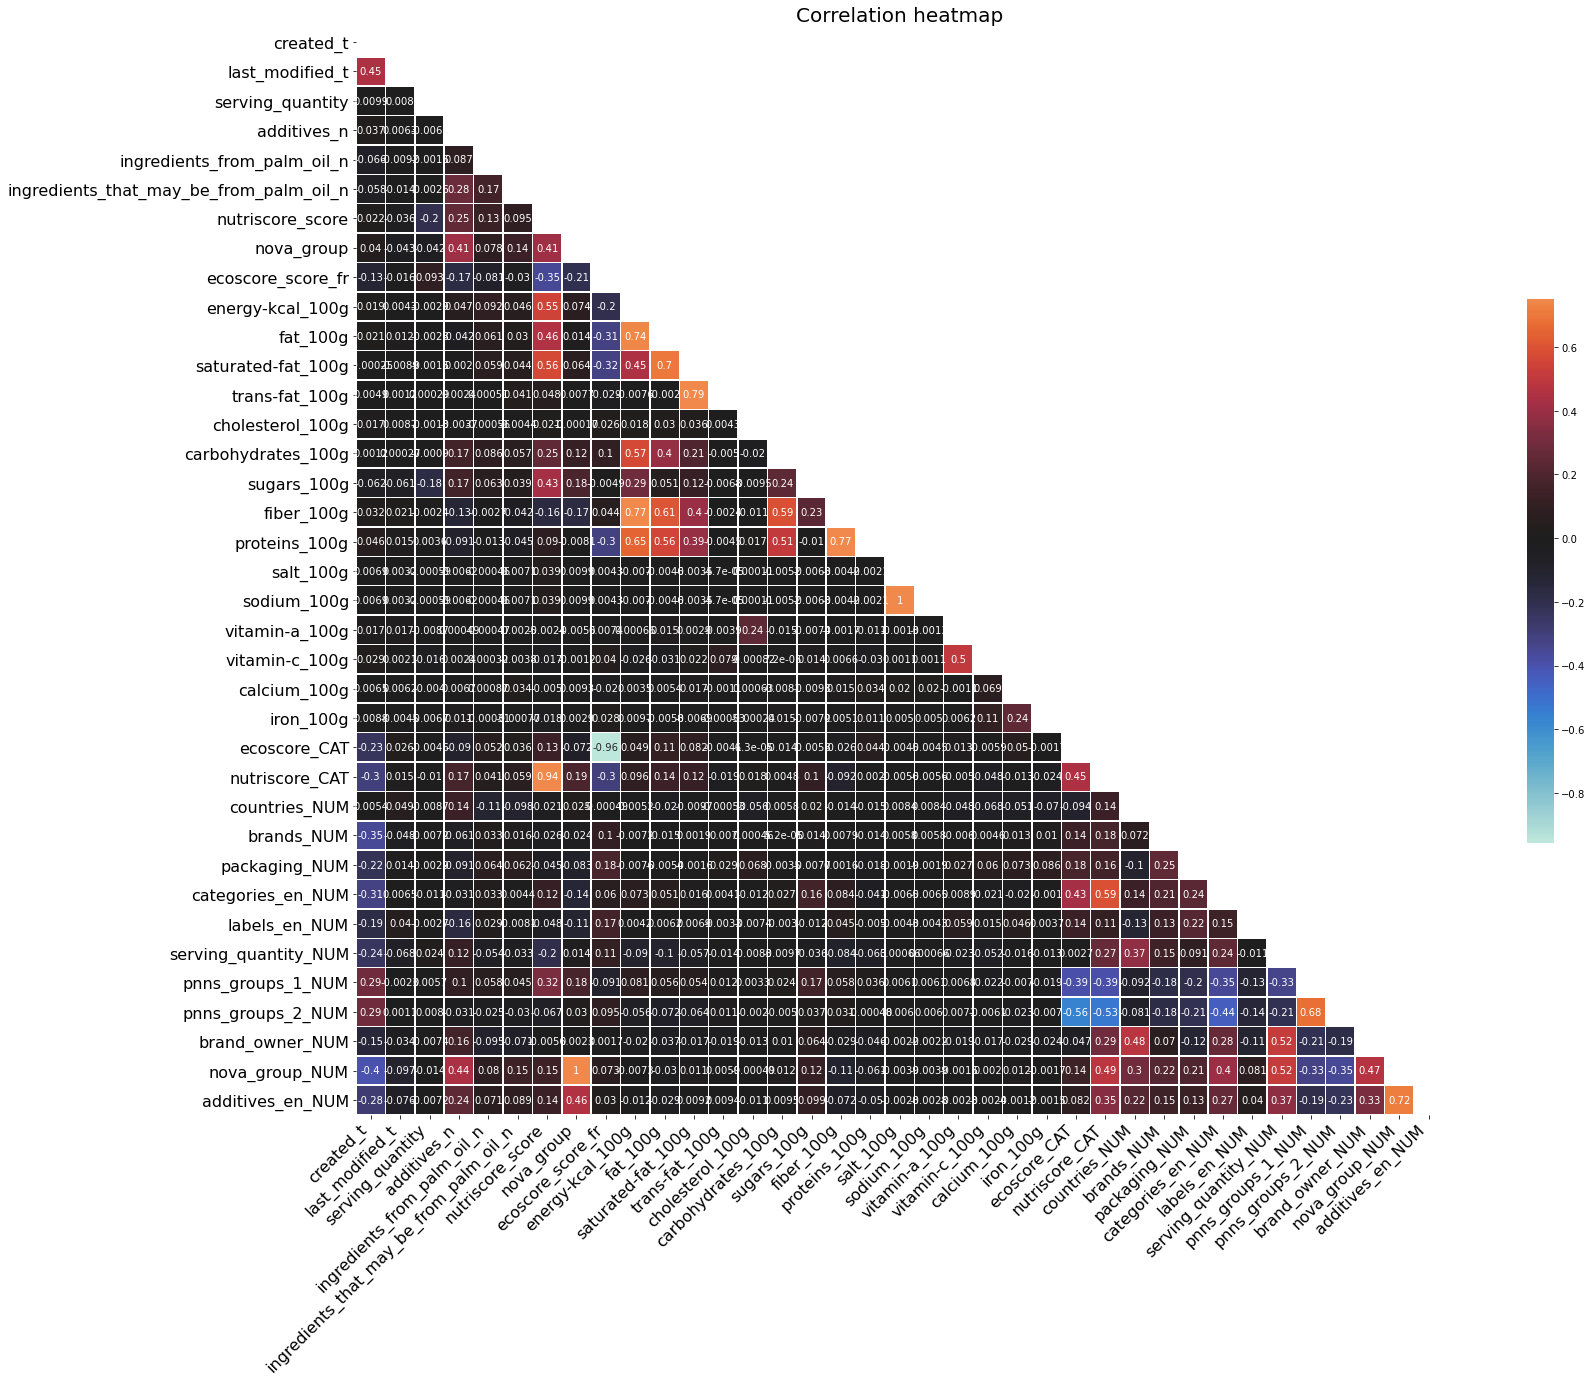

In [57]:
plt.figure(figsize=(30, 20))

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(data=corr, mask=mask, annot=True, vmax=.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation heatmap", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.show()

boxplot

pie chart

La définition des quantiles est correctement maîtrisées.

Les éventuelles valeurs aberrantes ont été mises en évidence. Une solution est proposée (elle doit être justifiée si plusieurs choix sont possibles).

Les distributions observées sont correctement caractérisées (uni, bi, multi-modale).

La définition mathématique de la corrélation et les hypothèses sous-jacentes ont été expliquées
